# DS6105 Data Science Assignment 5:

Combine Data Cleaning, Feature Selection, Modeling, and Interpretability into one report (Every assignment except TMINST) and make it a cohesive readable report.

 

The focus is readability and clarity.

 

The following must be answered:

1. What is the question?

2. What did you do?

3. How well did it work?

4. What did you learn?

# Dataset - Mobile Price Classification
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

Available on Kaggle: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification


# Steps for the Assignment



1.   Node 1 - Data Quality
2.   Node 2 - Fix Data
3.   Node 3 - Feature Selection
4.   Node 4 - Modelling (AutoML)
5.   Node 5 - Model Interpreatability & Error Analysis
6.   Node 6 - Report and Visualization



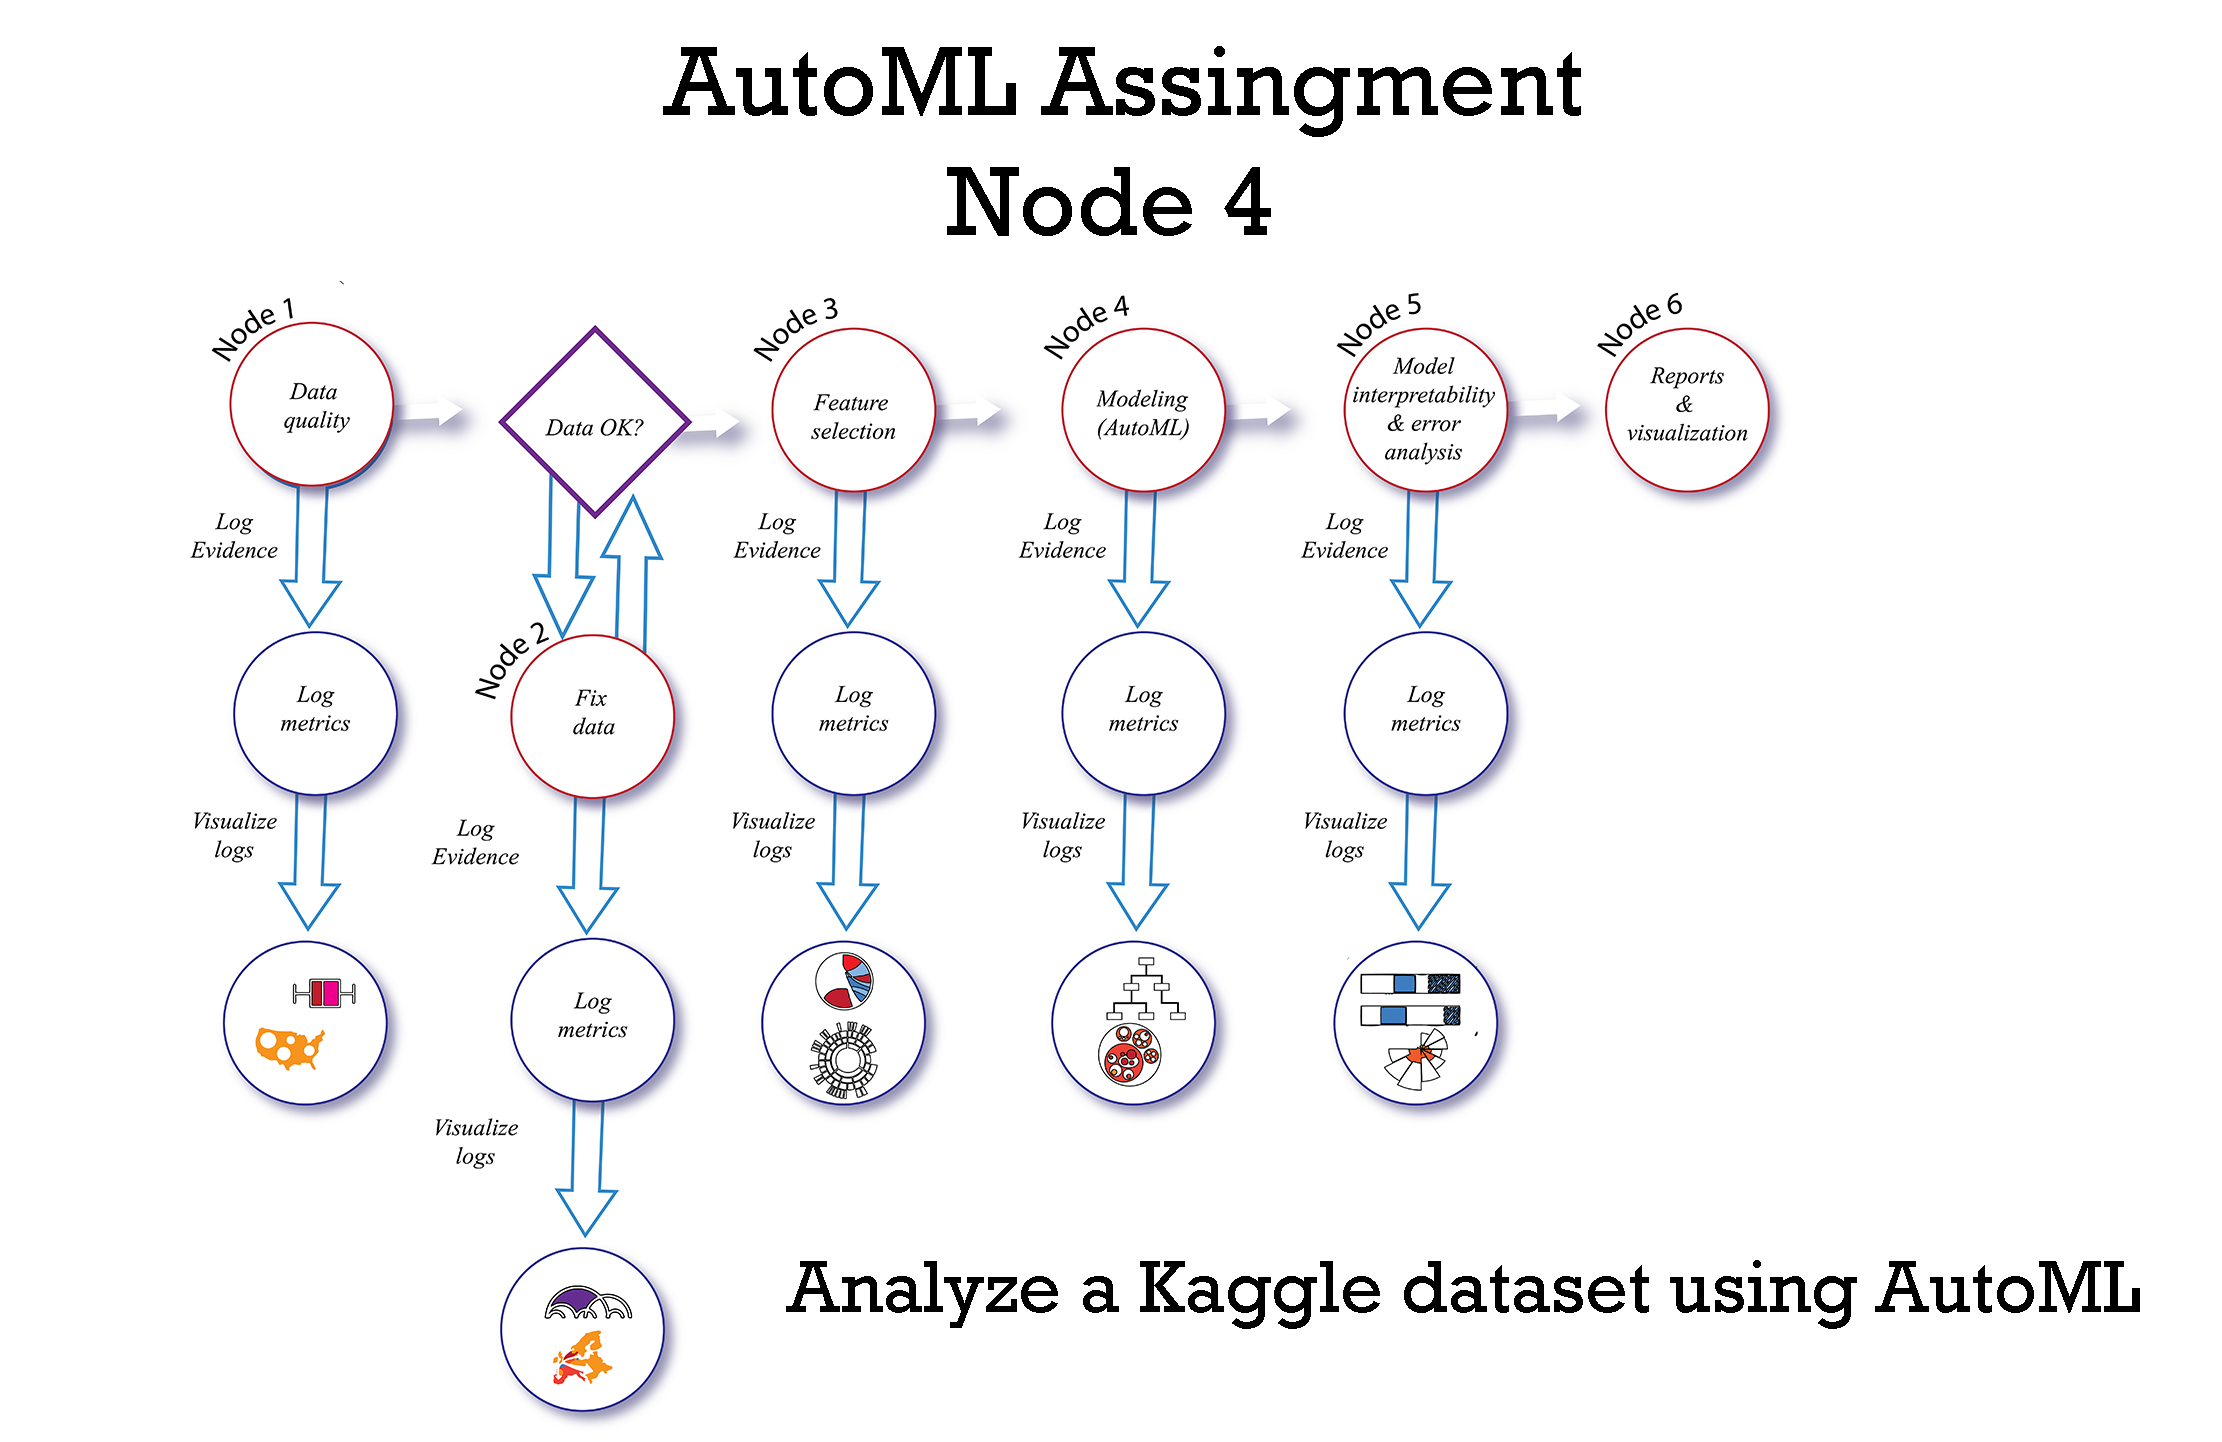

# Import Tools and Libraries


In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve

# Data Cleaning & Processing:  

1.   Node 1 - Data Quality
2.   Node 2 - Fix Data
3.   Node 3 - Feature Selection

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/proper-dataset/dataset/train.csv')
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

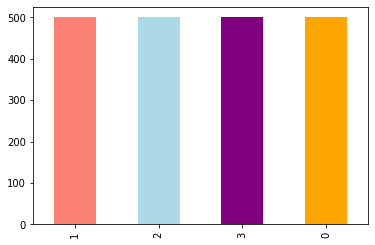

In [5]:
df['price_range'].value_counts().plot(kind='bar', color=['salmon', 'lightblue', 'purple', 'orange']);

##  1.What are the data types? (Only numeric and categorical)

Ans. There are only 2 types of data type in the dataset float64 and int64 both are numeric datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## 2. Are there any missing values in the train data?
Ans. There we no missing values in the data set.

In [7]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 3. What are the likely distributions of the numeric variables?
Ans. Plotting the histogram from few numerice varibales `battery_power`, `ram` and `int_memory`


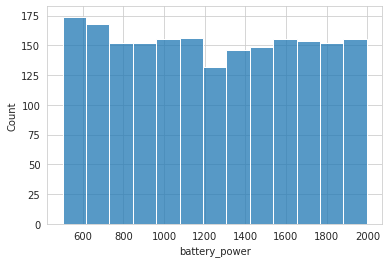

In [8]:
# Plot for Batter Power
sns.set_style('whitegrid')
sns.histplot(df.battery_power); 

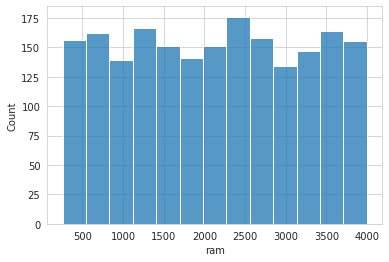

In [9]:
# Plot for Ram
sns.set_style('whitegrid')
sns.histplot(df.ram); 

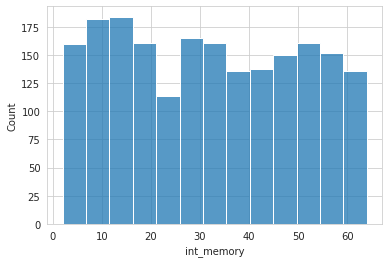

In [10]:
# Plot for Internal Memory
sns.set_style('whitegrid')
sns.histplot(df.int_memory); 

## 4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
Ans. To find out which independent variable would be most useful we will use following methods:

* Univariate Selection
* Feature Importance
* Correlation Matrix



### Method 1: Univariate Selection

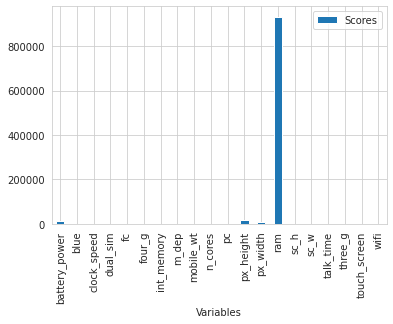

In [11]:
# Import the library
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Create the X_train and y_train
X_train = df.drop("price_range", axis = 1)
y_train = df["price_range"]

#apply the  SelectKBest method to find top 10 best features
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X_train,y_train)

# Dat
data = {'Scores': fit.scores_,
        'Variables': X_train.columns.to_numpy()
       }
  
# Plot the results
df = pd.DataFrame(data,columns=['Scores','Variables',])
df.plot(x ='Variables', y='Scores',  kind = 'bar')
plt.show()

### Conclusion: From the result we see that `ram` is the most significant factor independent variable which affect the price of the mobile phone followed by  `battery_power`, `px_height` and `px_width` 

### Method 2: Feature Importance

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) # using inbuilt class feature_importances of tree based classifiers

[0.05981347 0.01989247 0.03314266 0.01961587 0.03262563 0.01789442
 0.0348521  0.03419698 0.03755261 0.03278462 0.03338629 0.04725879
 0.04764253 0.39178201 0.0343423  0.03433606 0.03530966 0.01441278
 0.0192822  0.01987655]


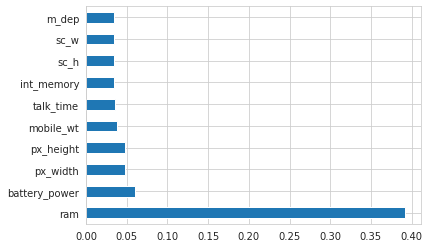

In [13]:
# Plot graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Conclusion: From the result we see that `ram` is the most significant factor independent variable which affect the price of the mobile phone followed by  `battery_power`, `px_height` and `px_width` 

### Method 3: Correlation Matrix

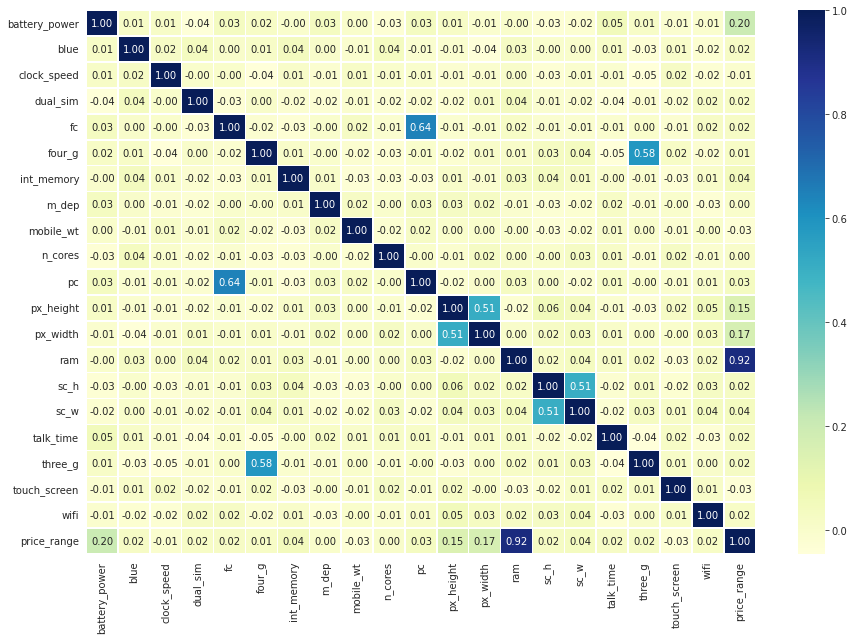

In [14]:
# Creating correaltion matrix on the entire Train dataset
df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/proper-dataset/dataset/train.csv')
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu");

### Conclusion: We can see from the correlation matrix `ram` is the most important feature with a score of 0.92

## 5. Which independent variables have missing data? How much? 
Ans. There are no missing data in the independent variables within the train and test data.

Independent variables listed below:
* `battery_power`    
* `blue`     
* `clock_speed`     
* `dual_sim`     
* `fc`     
* `four_g`     
* `int_memory`     
* `m_dep`     
* `mobile_wt`     
* `n_cores`     
* `pc`     
* `px_height `     
* `px_width`     
* `ram`     
* `sc_h`     
* `sc_w`     
* `talk_time `     
* `three_g`     
* `touch_screen`     
* `wifi`


In [15]:
# Check the missing values in the train set
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 6. Do the training and test sets have the same data?
Ans. Train and test dataset are 2 different CSV files, there are 2000 row in train dataset whereas test has about 1000.

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/proper-dataset/dataset/train.csv')

X = df.drop("price_range", axis = 1)
y = df["price_range"]

# Create the X_train and y_train
X_train = df.drop("price_range", axis = 1)
y_train = df["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
X_train.shape, X_test.shape

((1600, 20), (400, 20))

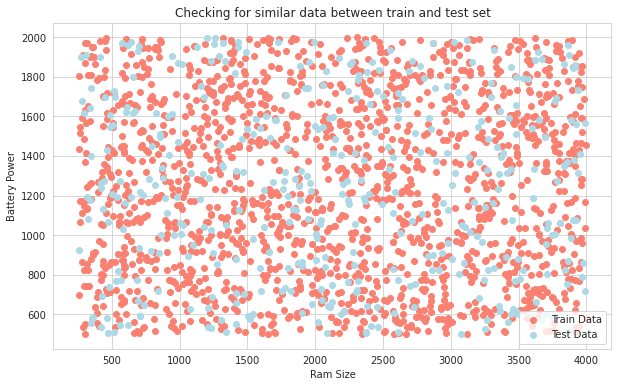

In [17]:

# Scatter plot between test and train data

# Create another figure 
plt.figure(figsize=(10, 6))

# Scatter with the postive examples
plt.scatter(X_train.ram ,
            X_train.battery_power,
            c="salmon")

# Scatter with negitive examples
plt.scatter(X_test.ram,
            X_test.battery_power,
           c="lightblue")

# Add some helpful info
plt.title("Checking for similar data between train and test set")
plt.xlabel("Ram Size")
plt.ylabel("Battery Power")
plt.legend(["Train Data", "Test Data"]);


## 7. In the predictor variables independent of all the other predictor variables?


In [18]:

X_train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1083           1330     0          1.1         0  11       0          37   
1879            983     0          1.8         0   0       1          53   
1240           1994     1          0.8         1   2       1           7   
1433            659     0          2.2         0   0       1          24   
874            1332     0          0.8         1   2       0          11   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1083    0.7        126        7  20       1103      1637  2166    10     1   
1879    0.9        187        1   4       1001      1176  1389    17     8   
1240    0.6         88        8   4        667       711   454    11     8   
1433    0.7        151        8   2        924      1877  3925     8     1   
874     0.5        187        2   4        758      1165  1285     5     0   

      talk_time  three_g  touch_screen  wifi  
1083          4        1             0     0  
1879          8        1             1     1  
1240          6        1             1     0  
1433         10        1             1     1  
874           9        1             1     0

In [19]:
# Selecting the top 10 relevant features
pred_var = X_train[['ram', 'battery_power', 'int_memory' ,'px_height', 'px_width', 'mobile_wt','sc_h','sc_w', 'talk_time', 'pc']]
pred_var.head()

ram  battery_power  int_memory  px_height  px_width  mobile_wt  sc_h  \
1083  2166           1330          37       1103      1637        126    10   
1879  1389            983          53       1001      1176        187    17   
1240   454           1994           7        667       711         88    11   
1433  3925            659          24        924      1877        151     8   
874   1285           1332          11        758      1165        187     5   

      sc_w  talk_time  pc  
1083     1          4  20  
1879     8          8   4  
1240     8          6   4  
1433     1         10   2  
874      0          9   4

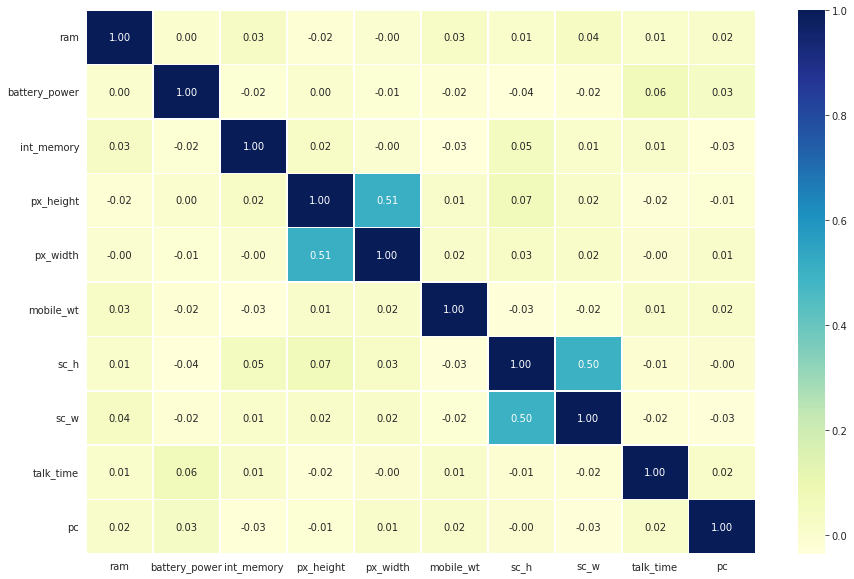

In [20]:
corr_matrix = pred_var.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu");

### Conclusion: Here from the correlation matrix, we can see that none of the variable are highly correlation, only the `px_height`, `px_width`, `sc_` and `sc_w` are correlated and logically they would be related as they are phone dimensions.

## 8. Which predictor variables are the most important?
Ans. We will create RandomForestClassifier and then find out the most important predictor variable.

In [21]:


# Split data into train and test sets
np.random.seed(42)
df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/proper-dataset/dataset/train.csv')

X = df.drop("price_range", axis = 1)
y = df["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [22]:
# Fit an instance of RandomForestClassifier  
clf = RandomForestClassifier()
clf.fit(X_train, y_train);
clf.score(X_test, y_test)


0.8925

In [23]:
# We get accuracy of 89.92% with the RandomForestClassifier
clf.feature_importances_

array([0.07578346, 0.00562716, 0.02729063, 0.00689239, 0.02475708,
       0.00655967, 0.03773306, 0.02415295, 0.03947934, 0.02157999,
       0.02948695, 0.05530035, 0.05722632, 0.48615643, 0.02661565,
       0.02640653, 0.03021725, 0.00614618, 0.00659293, 0.00599567])

In [24]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.feature_importances_)))
feature_dict

{'battery_power': 0.07578345802163748,
 'blue': 0.005627160713035773,
 'clock_speed': 0.027290631705704293,
 'dual_sim': 0.0068923863976345775,
 'fc': 0.02475708243233716,
 'four_g': 0.0065596714860624026,
 'int_memory': 0.037733061530648496,
 'm_dep': 0.024152947327342144,
 'mobile_wt': 0.03947934449970994,
 'n_cores': 0.02157998759286398,
 'pc': 0.029486949357894972,
 'px_height': 0.05530034913571567,
 'px_width': 0.05722632277428072,
 'ram': 0.4861564334995422,
 'sc_h': 0.02661565387487305,
 'sc_w': 0.026406531521902518,
 'talk_time': 0.030217252034676047,
 'three_g': 0.006146176423763108,
 'touch_screen': 0.006592932271784134,
 'wifi': 0.00599566739859143}

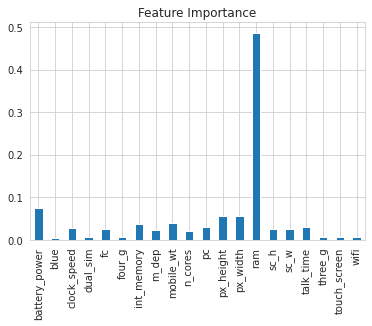

In [25]:
# Visualise feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

### Conclusion: Here we see the `ram` is the most important predictor variable

## 9. Do the ranges of the predictor variables make sense?
Ans. Yes, We have found out that the predictor variable `ram` is a significant factor for mobile phone, Ram are made up of semiconducters which is expensive. Hence, as the cost of the ram goes up the price of the mobile will also go up.

## 10. What are the distributions of the predictor variables?   



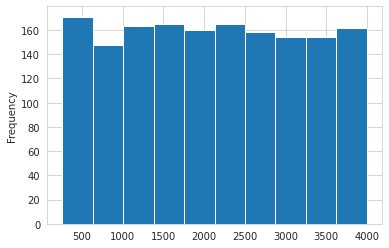

In [26]:
# Check the distribution of the age column with a histogram
X_train.ram.plot.hist();

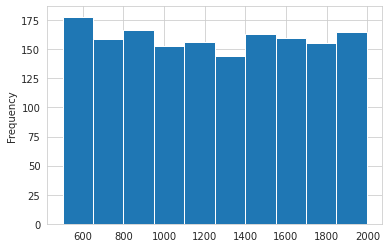

In [27]:
# Check the distribution of the age column with a histogram
X_train.battery_power.plot.hist();

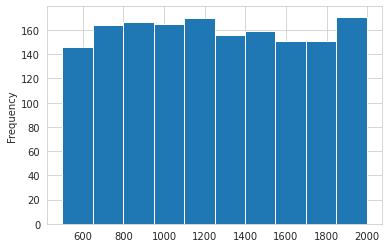

In [28]:
# Check the distribution of the age column with a histogram
X_train.px_width.plot.hist();

## 11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?


### Model with outliers

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Split data into train and test sets
np.random.seed(42)
df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/proper-dataset/dataset/train.csv')


X = df.drop("price_range", axis = 1)
y = df["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# Fit an instance of RandomForestClassifier  
clf = RandomForestClassifier()
clf.fit(X_train, y_train);
clf.score(X_test, y_test)


0.8925

### Model with outlier get an accuracy score of `89.92%` 

### Finding out the max and min threshold for the outliers on `battery_power`

In [30]:
min_threshold, max_threshold = X.battery_power.quantile([0.001, 0.95])
min_threshold, max_threshold

(501.999, 1930.1499999999999)

In [31]:
df[df.battery_power > max_threshold]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
7              1954     0          0.5         1   0       0          24   
22             1949     0          2.6         1   4       0          47   
55             1936     0          2.1         1  10       1          46   
91             1977     1          2.0         1   7       1          54   
103            1939     1          2.8         1   0       1          55   
...             ...   ...          ...       ...  ..     ...         ...   
1890           1991     0          2.8         0   3       1          15   
1913           1969     0          1.2         1   9       0          63   
1924           1982     1          1.6         0   2       1          12   
1958           1976     1          2.6         1   6       0          45   
1996           1965     1          2.6         1   0       0          39   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
7       0.8        187        4  ...        512      1149   700    16     3   
22      0.3        199        4  ...        407       822  1433    11     5   
55      0.6        104        3  ...        667      1036  2552    14     7   
91      1.0        171        7  ...       1226      1242  1971    18     7   
103     0.6        199        4  ...        320       520  1047    14    10   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1890    0.1        181        1  ...        298      1037  1861     8     5   
1913    0.2        132        4  ...        390       756   298    10     1   
1924    0.2         80        5  ...        287       593  1824    13     3   
1958    1.0        136        4  ...        652      1933  2470    11     1   
1996    0.2        187        4  ...        915      1965  2032    11    10   

      talk_time  three_g  touch_screen  wifi  price_range  
7             5        1             1     1            0  
22           20        0             0     1            1  
55           13        1             0     0            2  
91           14        1             1     0            2  
103          18        1             1     0            0  
...         ...      ...           ...   ...          ...  
1890         17        1             1     1            1  
1913         10        1             1     0            0  
1924         14        1             1     1            1  
1958          3        0             0     0            3  
1996         16        1             1     1            2  

[100 rows x 21 columns]

In [32]:
# Creating dataset without outliers
df_outlier = df[(df.battery_power < max_threshold) & (df.battery_power > min_threshold)]
df_outlier

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1994            858     0          2.2         0   1       0          50   
1995            794     1          0.5         1   0       1           2   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1994    0.1         84        1  ...        528      1416  3978    17    16   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1994          3        1             1     0            3  
1995         19        1             1     0            0  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[1898 rows x 21 columns]

In [33]:
# Split data into train and test sets
np.random.seed(42)

X = df_outlier.drop("price_range", axis = 1)
y = df_outlier["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# Fit an instance of RandomForestClassifier  
clf = RandomForestClassifier()
clf.fit(X_train, y_train);
clf.score(X_test, y_test)


0.9026315789473685

### Model without outlier get an accuracy score of `90.26%`

### Conclusion: Without the outlier we are getting a higher accuracy


## 12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error. For categorical data, calculate the accuracy and a confusion matrix.

Ans.We will manually remove some of the data point from the csv file and load into our new dataframe `df_missing_value`.
Then we use the `SimpleImputer` and `ColumnTransformer` method to refill our dataset.

In [34]:
df_missing_value = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/main/dataset/train.csv')

In [35]:
df_missing_value.head()

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0          842.0     0          2.2         0   1.0     0.0         7.0   
1         1021.0     1          0.5         1   0.0     1.0        53.0   
2          563.0     1          0.5         1   2.0     1.0        41.0   
3          615.0     1          2.5         0   0.0     0.0        10.0   
4         1821.0     1          1.2         0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0  ...      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0  ...     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0  ...     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  ...     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19      0.0           0.0     1            1  
1          7      1.0           1.0     0            2  
2          9      1.0           1.0     0            2  
3         11      1.0           0.0     0            2  
4         15      1.0           1.0     0            1  

[5 rows x 21 columns]

In [36]:
df_missing_value.isna().sum()

battery_power    23
blue              0
clock_speed       0
dual_sim          0
fc                1
four_g            1
int_memory        1
m_dep             0
mobile_wt         3
n_cores           1
pc                2
px_height         3
px_width          5
ram               4
sc_h              1
sc_w              1
talk_time         0
three_g           1
touch_screen      1
wifi              0
price_range       0
dtype: int64

### Method 1: Using Simple Imputer

In [37]:

# Filling the missing value with imputer
mean_imputer = SimpleImputer(strategy="mean")
median_imputer = SimpleImputer(strategy="median")
constant_imputer = SimpleImputer(strategy="constant", fill_value=1)

# Define columns
mean_features = ["battery_power", "fc", "int_memory", "mobile_wt", "px_height", "px_width", "sc_h", "sc_w"]
median_features = ["n_cores", "pc", "ram"]
constant_features = ["four_g", "three_g","touch_screen"]

imputer = ColumnTransformer([
    ("mean_imputer", mean_imputer, mean_features),
    ("median_imputer", median_imputer, median_features),
    ("constant_imputer", constant_imputer, constant_features)
])

df_imputer = imputer.fit_transform(df_missing_value)

# Get our transformed data array's back into DataFrame's
df_with_imputed_data = pd.DataFrame(df_imputer, columns=[
    "battery_power",
    "fc",
    "int_memory",
    "mobile_wt",
    "px_height",
    "px_width",
    "sc_h",
    "sc_w",
    "n_cores",
    "pc",
    "ram",
 "four_g",
    "three_g",
    "touch_screen"
    ])

df_with_imputed_data

battery_power    fc  int_memory  mobile_wt  px_height  px_width  sc_h  \
0             842.0   1.0         7.0      188.0       20.0     756.0   9.0   
1            1021.0   0.0        53.0      136.0      905.0    1988.0  17.0   
2             563.0   2.0        41.0      145.0     1263.0    1716.0  11.0   
3             615.0   0.0        10.0      131.0     1216.0    1786.0  16.0   
4            1821.0  13.0        44.0      141.0     1208.0    1212.0   8.0   
...             ...   ...         ...        ...        ...       ...   ...   
1995          794.0   0.0         2.0      106.0     1222.0    1890.0  13.0   
1996         1965.0   0.0        39.0      187.0      915.0    1965.0  11.0   
1997         1911.0   1.0        36.0      108.0      868.0    1632.0   9.0   
1998         1512.0   4.0        46.0      145.0      336.0     670.0  18.0   
1999          510.0   5.0        45.0      168.0      483.0     754.0  19.0   

      sc_w  n_cores    pc     ram  four_g  three_g  touch_screen  
0      7.0      2.0   2.0  2549.0     0.0      0.0           0.0  
1      3.0      3.0   6.0  2631.0     1.0      1.0           1.0  
2      2.0      5.0   6.0  2603.0     1.0      1.0           1.0  
3      8.0      6.0   9.0  2769.0     0.0      1.0           0.0  
4      2.0      2.0  14.0  1411.0     1.0      1.0           1.0  
...    ...      ...   ...     ...     ...      ...           ...  
1995   4.0      6.0  14.0   668.0     1.0      1.0           1.0  
1996  10.0      4.0   3.0  2032.0     0.0      1.0           1.0  
1997   1.0      8.0   3.0  3057.0     1.0      1.0           1.0  
1998  10.0      5.0   5.0   869.0     1.0      1.0           1.0  
1999   4.0      6.0  16.0  3919.0     1.0      1.0           1.0  

[2000 rows x 14 columns]

In [38]:
# Check to see the original... still missing values
df_with_imputed_data.isna().sum()

battery_power    0
fc               0
int_memory       0
mobile_wt        0
px_height        0
px_width         0
sc_h             0
sc_w             0
n_cores          0
pc               0
ram              0
four_g           0
three_g          0
touch_screen     0
dtype: int64

### Method 2: Using Pandas method
 

In [39]:
# Loading the missing value data

df_pandas =  pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/main/dataset/train.csv')
df_pandas.isna().sum()

battery_power    23
blue              0
clock_speed       0
dual_sim          0
fc                1
four_g            1
int_memory        1
m_dep             0
mobile_wt         3
n_cores           1
pc                2
px_height         3
px_width          5
ram               4
sc_h              1
sc_w              1
talk_time         0
three_g           1
touch_screen      1
wifi              0
price_range       0
dtype: int64

In [40]:

# Using the pandas inbuilt methods to replace the missing values

df_pandas["fc"] = df_pandas["fc"].fillna(df_pandas["fc"].mean())
df_pandas["int_memory"] = df_pandas["int_memory"].fillna(df_pandas["int_memory"].mean())
df_pandas["mobile_wt"] = df_pandas["mobile_wt"].fillna(df_pandas["mobile_wt"].mean())
df_pandas["px_height"] = df_pandas["px_height"].fillna(df_pandas["px_height"].mean())
df_pandas["px_width"] = df_pandas["px_width"].fillna(df_pandas["px_width"].mean())
df_pandas["sc_h"] = df_pandas["sc_h"].fillna(df_pandas["sc_h"].mean())
df_pandas["sc_w"] = df_pandas["sc_w"].fillna(df_pandas["sc_w"].mean())
df_pandas["n_cores"] = df_pandas["n_cores"].fillna("missing")
df_pandas["pc"] = df_pandas["pc"].fillna(df_pandas["pc"].mode())
df_pandas["ram"] = df_pandas["ram"].fillna(df_pandas["ram"].mean())
df_pandas["battery_power"] = df_pandas["battery_power"].fillna(df_pandas["battery_power"].mean())
df_pandas["three_g"] = df_pandas["three_g"].fillna("missing")
df_pandas["four_g"] = df_pandas["four_g"].fillna(1)
df_pandas["touch_screen"] = df_pandas["touch_screen"].fillna(1)


In [41]:
df_pandas.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               2
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Method 3: Discarding all missing values

In [42]:
# Loading the missing value data
df_missing =  pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/main/dataset/train.csv')
df_missing.isna().sum()

battery_power    23
blue              0
clock_speed       0
dual_sim          0
fc                1
four_g            1
int_memory        1
m_dep             0
mobile_wt         3
n_cores           1
pc                2
px_height         3
px_width          5
ram               4
sc_h              1
sc_w              1
talk_time         0
three_g           1
touch_screen      1
wifi              0
price_range       0
dtype: int64

In [43]:
df_missing.dropna(inplace=True)


In [44]:
df_missing.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [45]:
# Plot confusion matrix
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                      fmt='g',
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 

In [46]:
# Creating model on dataset with orignal

# Split data into train and test sets
np.random.seed(42)
df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/proper-dataset/dataset/train.csv')
X = df.drop("price_range", axis = 1)
y = df["price_range"]

X_missing =  df_missing.drop("price_range", axis = 1)
y_missing = df_missing['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
X_missing_train, X_missing_test, y_missing_train, y_missing_test = train_test_split(X_missing, y_missing, test_size= 0.2)

# Fit an instance of RandomForestClassifier for orignal dataset
clf = RandomForestClassifier()
clf.fit(X_train, y_train);
y_preds = clf.predict(X_test)
clf.score(X_test, y_test)


0.8825

### The accuracy of model without imputer is `88.25%`

In [47]:
# Fit an instance of RandomForestClassifier with missing dataset
clf_missing = RandomForestClassifier()
clf_missing.fit(X_missing_train, y_missing_train);
y_missing_preds = clf_missing.predict(X_missing_test)
clf_missing.score(X_missing_test, y_missing_test)


0.875

### The accuracy of model with missing data is `85.96%`

# Confusion matrix for Orginal Data set

[[101   4   0   0]
 [  6  76   9   0]
 [  0   8  76   8]
 [  0   0  12 100]]


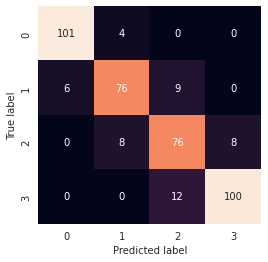

In [48]:
plot_conf_mat(y_test, y_preds)
print(confusion_matrix(y_test, y_preds))

[[89  4  0  0]
 [ 6 80 11  0]
 [ 0 10 86  8]
 [ 0  0 10 88]]


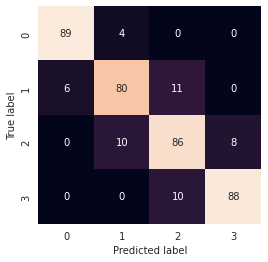

In [49]:
print(confusion_matrix(y_missing_test, y_missing_preds))
plot_conf_mat(y_missing_test, y_missing_preds)

## Here we see that the accuracy decrease for the missing data.

# Conclusion: 
## We find out that, ram is the most significant variable which increases the price of mobile phones. Higher the ram size high is the price range of the mobile phone.

# Node 4: Modelling AutoML

## Install Packages

In [50]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o



Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 177.0 MB 25 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.1-py2.py3-none-any.whl size=177068062 sha256=808ef8a5e4955d1d609aedfb5f5d8604ecb9f8a6d2637cf625eb638c5dcddfae
  Stored in directory: /root/.cache/pip/wheels/a6/d9/ab/5442447c7e2ccf07f66aa8b79f3877ce5382f0b95e6c0c797b
Successfully built h2o


## Import Libraries

In [51]:
# Import libraries
# Use pip install or conda install if missing a library
import warnings
warnings.filterwarnings('ignore')
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Start AutoML Server

In [52]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [53]:
# Use 50% of availible resources
pct_memory=0.75
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

8


In [54]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:25054 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpr4skgehz
  JVM stdout: /tmp/tmpr4skgehz/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpr4skgehz/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:25054
Connecting to H2O server at http://127.0.0.1:25054 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.1.1
H2O_cluster_version_age:    23 days
H2O_cluster_name:           H2O_from_python_unknownUser_cptnix
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    8 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:25054
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.13 final
--------------------------  ----------------------------------

## Importing the dataset from Github  repo

In [55]:
# Download the train data csv file and load in the training dataset 
train_url = "https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/main/dataset/train.csv"
df = h2o.import_file(path = train_url)

pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [56]:
df_train.head()

battery_power blue clock_speed dual_sim fc four_g int_memory m_dep mobile_wt n_cores pc px_height px_width ram sc_h sc_w talk_time three_g touch_screen wifi price_range 
 
 
 842 0 2.2 0 1 0 7 0.6 188 2 2 20 756 2549 9 7 19 0 0 1 1 
 1021 1 0.5 1 0 1 53 0.7 136 3 6 905 1988 2631 17 3 7 1 1 0 2 
 563 1 0.5 1 2 1 41 0.9 145 5 6 1263 1716 2603 11 2 9 1 1 0 2 
 615 1 2.5 0 0 0 10 0.8 131 6 9 1216 1786 2769 16 8 11 1 0 0 2 
 1821 1 1.2 0 13 1 44 0.6 141 2 14 1208 1212 1411 8 2 15 1 1 0 1 
 1821 0 1.7 0 4 1 10 0.8 139 8 10 381 1018 3220 13 8 18 1 0 1 3 
 1445 1 0.5 0 0 0 53 0.7 174 7 14 386 836 1099 17 1 20 1 0 0 0 
 509 1 0.6 1 2 1 9 0.1 93 5 15 1137 1224 513 19 10 12 1 0 0 0 
 1520 1 2.2 0 5 1 33 0.5 177 8 18 151 1005 3826 14 9 13 1 1 1 3 
 1815 0 2.8 0 2 0 33 0.6 159 4 17 607 748 1482 18 0 2 1 0 0 1

In [57]:
df_test.head()

battery_power blue clock_speed dual_sim fc four_g int_memory m_dep mobile_wt n_cores pc px_height px_width ram sc_h sc_w talk_time three_g touch_screen wifi price_range 
 
 
 1859 0 0.5 1 3 0 22 0.7 164 1 7 1004 1654 1067 17 1 10 1 0 0 1 
 1954 0 0.5 1 0 0 24 0.8 187 4 0 512 1149 700 16 3 5 1 1 1 0 
 769 1 2.9 1 0 0 9 0.1 182 5 1 248 874 3946 5 2 7 0 0 0 3 
 1866 0 0.5 0 13 1 52 0.7 185 1 17 356 563 373 14 9 3 1 0 1 0 
 1579 1 0.5 1 0 0 5 0.2 88 7 9 1358 1739 3532 17 11 12 0 0 1 3 
 560 0 0.5 1 15 0 50 0.3 159 2 20 1448 1613 2150 18 12 11 1 1 0 2 
 1054 1 1.8 1 3 1 40 0.8 196 7 10 27 774 2296 16 12 12 1 0 1 1 
 1654 1 1.5 1 0 1 43 0.3 109 2 0 546 629 3112 12 5 10 1 1 0 3 
 1156 1 1.2 1 0 1 50 0.8 159 2 0 322 547 470 7 0 15 1 1 0 0 
 616 0 1.9 1 13 1 44 0.8 81 3 17 651 1618 3366 18 8 13 1 1 0 3

In [58]:
df_train.shape


(1623, 21)

In [59]:
df_test.shape

(377, 21)

In [60]:
X = df_train.columns
print(X)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [61]:
y = 'price_range'
X.remove(y)


In [62]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [63]:
aml.train(x=X,y=y,training_frame=df_train)  

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_4_AutoML_1_20220507_05659

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.01817153278111191
RMSE: 0.13480182781072336
MAE: 0.10675231147686208
RMSLE: 0.06809158520661684
R^2: 0.9855550186157606
Mean Residual Deviance: 0.01817153278111191
Null degrees of freedom: 1622
Residual degrees of freedom: 1617
Null deviance: 2041.7054836722177
Residual deviance: 29.492397703744626
AIC: -1884.94566693262

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.07171163037058417
RMSE: 0.2677902731067433
MAE: 0.1943466158793955
RMSLE: 0.1299894928754938
R^2: 0.9429947281710178
Mean Residual Deviance: 0.07171163037058417
Null degrees of freedom: 1622
Residual degrees of freedom: 1617
Null deviance: 2042.

mean         sd  cv_1_valid  cv_2_valid  \
0                     mae    0.194725   0.011552    0.186818    0.190551   
1  mean_residual_deviance    0.071645   0.009240    0.061701    0.078156   
2                     mse    0.071645   0.009240    0.061701    0.078156   
3           null_deviance  408.409060  18.969332  407.841430  419.532140   
4                      r2    0.942808   0.008841    0.951724    0.939263   
5       residual_deviance   23.257338   3.007537   19.682768   25.478973   
6                    rmse    0.267220   0.017278    0.248398    0.279565   
7                   rmsle    0.129647   0.010875    0.119853    0.143358   

   cv_3_valid  cv_4_valid  cv_5_valid  
0    0.193169    0.214931    0.188157  
1    0.072191    0.082983    0.063194  
2    0.072191    0.082983    0.063194  
3  386.579470  394.358430  433.733860  
4    0.938358    0.932338    0.952356  
5   23.822920   26.637486   20.664536  
6    0.268683    0.288067    0.251385  
7    0.119397    0.138473    0.127154

In [64]:
print(aml.leaderboard)

model_id rmse mse mae rmsle mean_residual_deviance 
 
 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20220507_05659 0.26779 0.0717116 0.194347 0.129989 0.0717116 
 StackedEnsemble_AllModels_4_AutoML_1_20220507_05659 0.269764 0.0727725 0.193564 0.129802 0.0727725 
 StackedEnsemble_AllModels_3_AutoML_1_20220507_05659 0.269953 0.0728744 0.194365 0.129979 0.0728744 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20220507_05659 0.27401 0.0750816 0.207273 0.134415 0.0750816 
 StackedEnsemble_AllModels_2_AutoML_1_20220507_05659 0.27435 0.0752678 0.204396 0.133796 0.0752678 
 StackedEnsemble_AllModels_1_AutoML_1_20220507_05659 0.278957 0.0778167 0.205222 0.138031 0.0778167 
 GBM_grid_1_AutoML_1_20220507_05659_model_12 0.280365 0.0786045 0.172699 0.132711 0.0786045 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20220507_05659 0.281878 0.0794555 0.209036 0.140595 0.0794555 
 GBM_grid_1_AutoML_1_20220507_05659_model_5 0.288764 0.0833847 0.191125 0.138049 0.0833847 
 GBM_grid_1_AutoML_1_20220507_05659_model_2 0.291473 0.0849562 0.21401 0.141081 0.0849562

In [65]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict


{'GBM_grid_1_AutoML_1_20220507_05659_model_12': 6,
 'GLM_1_AutoML_1_20220507_05659': 40,
 'StackedEnsemble_AllModels_1_AutoML_1_20220507_05659': 5,
 'StackedEnsemble_AllModels_2_AutoML_1_20220507_05659': 4,
 'StackedEnsemble_AllModels_3_AutoML_1_20220507_05659': 2,
 'StackedEnsemble_AllModels_4_AutoML_1_20220507_05659': 1,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20220507_05659': 3,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20220507_05659': 0}

In [66]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

6


In [67]:
best_model.algo

'gbm'

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

**Feature Importance**


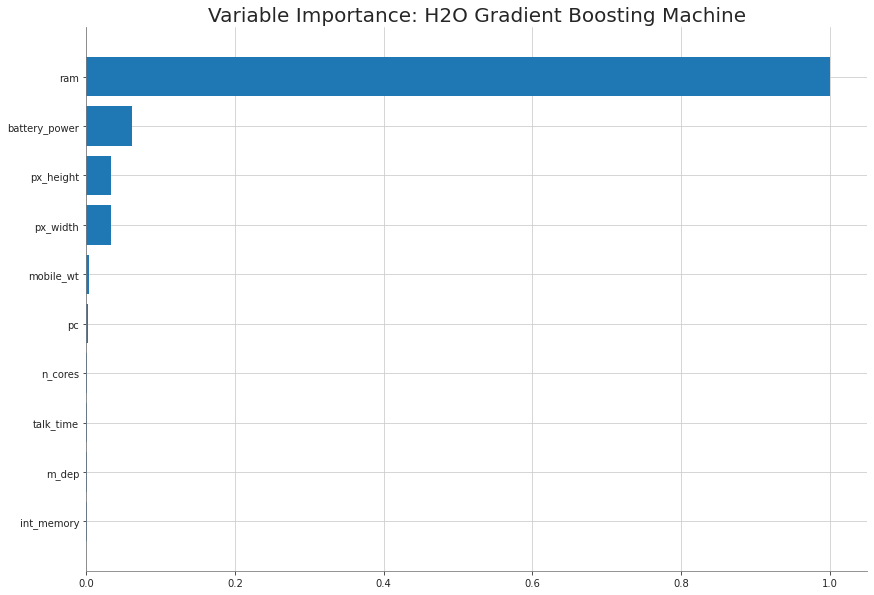

<Figure size 432x288 with 0 Axes>

In [69]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

40
glm


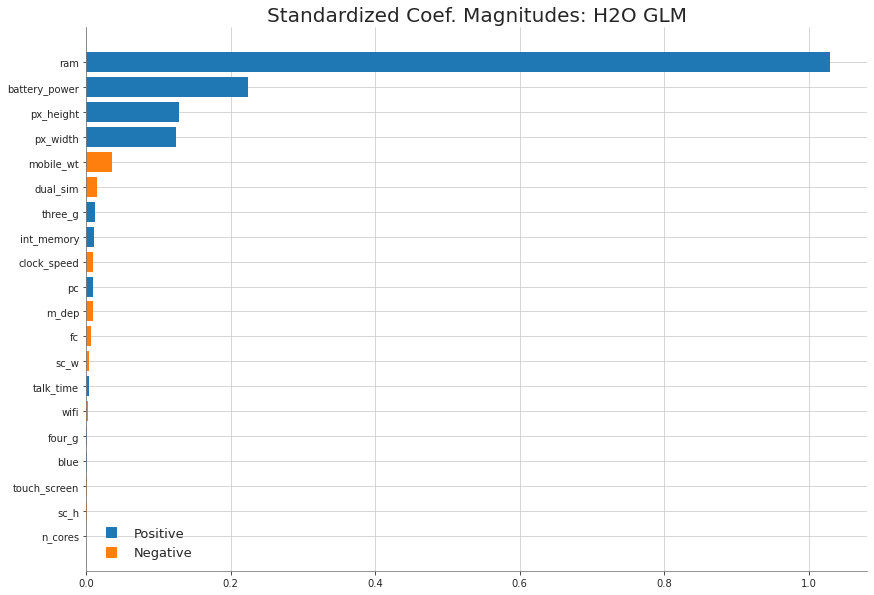

In [70]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

In [71]:
print(best_model.rmse(train = True))

0.05748851361332053


In [72]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [73]:
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 0.08090652499749573,
 'null_degrees_of_freedom': None,
 'null_deviance': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'rmse': 0.2844407231700407}

In [74]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [75]:
y_pred=h2o.as_list(predictions)
y_pred[0:5]

predict
0  0.986082
1  0.132616
2  2.772172
3  0.078556
4  3.006515

In [76]:
print(X)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%

PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220507_05659_model_12 on column 'ram'.


ram  mean_response  stddev_response  std_error_mean_response
0    256.000000       0.034345         0.083447                 0.001866
1    452.947368       0.034576         0.084076                 0.001880
2    649.894737       0.099896         0.204883                 0.004581
3    846.842105       0.211471         0.289928                 0.006483
4   1043.789474       0.273035         0.319264                 0.007139
5   1240.736842       0.593603         0.441888                 0.009881
6   1437.684211       0.746722         0.451489                 0.010096
7   1634.631579       0.970447         0.421796                 0.009432
8   1831.578947       1.191028         0.366891                 0.008204
9   2028.526316       1.336432         0.423387                 0.009467
10  2225.473684       1.539556         0.436657                 0.009764
11  2422.421053       1.866328         0.450298                 0.010069
12  2619.368421       2.020433         0.428871                 0.009590
13  2816.315789       2.273070         0.392041                 0.008766
14  3013.263158       2.462256         0.378284                 0.008459
15  3210.210526       2.695079         0.359782                 0.008045
16  3407.157895       2.850756         0.254771                 0.005697
17  3604.105263       2.890924         0.213214                 0.004768
18  3801.052632       2.942959         0.141025                 0.003153
19  3998.000000       2.944371         0.139117                 0.003111

[]

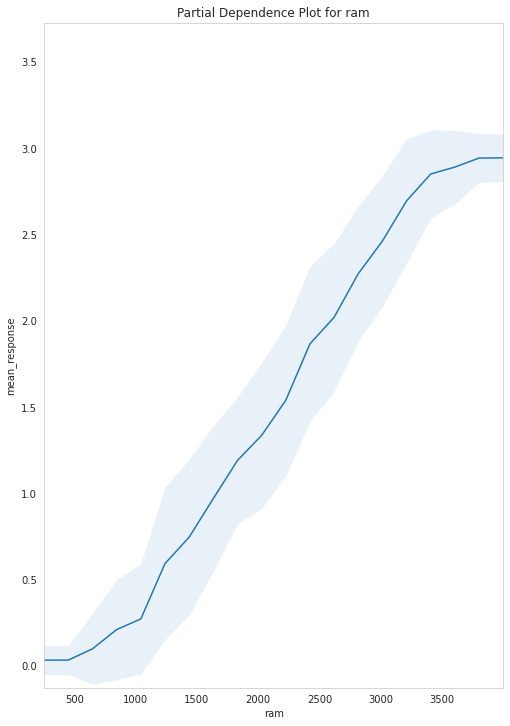

In [77]:
best_model.partial_plot(df, cols=['ram'])

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%

PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220507_05659_model_12 on column 'battery_power'.


battery_power  mean_response  stddev_response  std_error_mean_response
0      501.000000       1.200195         1.005931                 0.022493
1      579.789474       1.206236         1.008927                 0.022560
2      658.578947       1.246005         1.042203                 0.023304
3      737.368421       1.277127         1.062461                 0.023757
4      816.157895       1.293398         1.075672                 0.024053
5      894.947368       1.308429         1.070645                 0.023940
6      973.736842       1.354868         1.092243                 0.024423
7     1052.526316       1.413682         1.119072                 0.025023
8     1131.315789       1.459594         1.103931                 0.024685
9     1210.105263       1.465964         1.103011                 0.024664
10    1288.894737       1.547528         1.067015                 0.023859
11    1367.684211       1.582525         1.094477                 0.024473
12    1446.473684       1.614255         1.082588                 0.024207
13    1525.263158       1.698053         1.067170                 0.023863
14    1604.052632       1.708987         1.065286                 0.023821
15    1682.842105       1.732285         1.061575                 0.023738
16    1761.631579       1.744877         1.069890                 0.023923
17    1840.421053       1.769742         1.045691                 0.023382
18    1919.210526       1.778491         1.045823                 0.023385
19    1998.000000       1.792924         1.041452                 0.023288


PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220507_05659_model_12 on column 'px_height'.


px_height  mean_response  stddev_response  std_error_mean_response
0      0.000000       1.379822         1.068969                 0.023903
1    103.157895       1.392828         1.079632                 0.024141
2    206.315789       1.402527         1.084799                 0.024257
3    309.473684       1.410627         1.085702                 0.024277
4    412.631579       1.440567         1.086436                 0.024293
5    515.789474       1.456722         1.082502                 0.024205
6    618.947368       1.490025         1.093219                 0.024445
7    722.105263       1.519582         1.094336                 0.024470
8    825.263158       1.530103         1.097754                 0.024547
9    928.421053       1.559264         1.088495                 0.024339
10  1031.578947       1.575005         1.080072                 0.024151
11  1134.736842       1.598963         1.076744                 0.024077
12  1237.894737       1.626671         1.059904                 0.023700
13  1341.052632       1.665071         1.062209                 0.023752
14  1444.210526       1.700095         1.036075                 0.023167
15  1547.368421       1.749591         0.986357                 0.022056
16  1650.526316       1.766727         0.975561                 0.021814
17  1753.684211       1.766727         0.975561                 0.021814
18  1856.842105       1.766727         0.975561                 0.021814
19  1960.000000       1.785734         0.973692                 0.021772


PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220507_05659_model_12 on column 'px_width'.


px_width  mean_response  stddev_response  std_error_mean_response
0    500.000000       1.305171         1.056329                 0.023620
1    578.842105       1.328991         1.046565                 0.023402
2    657.684211       1.357803         1.043349                 0.023330
3    736.526316       1.365405         1.047645                 0.023426
4    815.368421       1.363542         1.051735                 0.023518
5    894.210526       1.388590         1.064488                 0.023803
6    973.052632       1.402950         1.058437                 0.023667
7   1051.894737       1.429596         1.071931                 0.023969
8   1130.736842       1.456402         1.087157                 0.024310
9   1209.578947       1.483384         1.085599                 0.024275
10  1288.421053       1.524727         1.101659                 0.024634
11  1367.263158       1.552515         1.115623                 0.024946
12  1446.105263       1.563488         1.109252                 0.024804
13  1524.947368       1.583985         1.094563                 0.024475
14  1603.789474       1.603013         1.085909                 0.024282
15  1682.631579       1.621177         1.083773                 0.024234
16  1761.473684       1.629500         1.082282                 0.024201
17  1840.315789       1.651862         1.081077                 0.024174
18  1919.157895       1.659539         1.076193                 0.024064
19  1998.000000       1.666029         1.081333                 0.024179


PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220507_05659_model_12 on column 'clock_speed'.


clock_speed  mean_response  stddev_response  std_error_mean_response
0      0.500000       1.500799         1.096999                 0.024530
1      0.631579       1.500602         1.096510                 0.024519
2      0.763158       1.502977         1.096906                 0.024528
3      0.894737       1.503240         1.097291                 0.024536
4      1.026316       1.504255         1.097983                 0.024552
5      1.157895       1.506293         1.099381                 0.024583
6      1.289474       1.505423         1.099988                 0.024596
7      1.421053       1.505178         1.099739                 0.024591
8      1.552632       1.505955         1.100295                 0.024603
9      1.684211       1.503100         1.099178                 0.024578
10     1.815789       1.501988         1.099106                 0.024577
11     1.947368       1.500964         1.099034                 0.024575
12     2.078947       1.493993         1.100982                 0.024619
13     2.210526       1.495411         1.099325                 0.024582
14     2.342105       1.493322         1.098859                 0.024571
15     2.473684       1.493379         1.099166                 0.024578
16     2.605263       1.493409         1.099501                 0.024586
17     2.736842       1.494133         1.099361                 0.024582
18     2.868421       1.496253         1.100105                 0.024599
19     3.000000       1.496253         1.100105                 0.024599


PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220507_05659_model_12 on column 'dual_sim'.


dual_sim  mean_response  stddev_response  std_error_mean_response
0       0.0       1.500503         1.098296                 0.024559
1       1.0       1.499245         1.101073                 0.024621


PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220507_05659_model_12 on column 'four_g'.


four_g  mean_response  stddev_response  std_error_mean_response
0     0.0       1.498911         1.098659                 0.024567
1     1.0       1.500924         1.100567                 0.024609


PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220507_05659_model_12 on column 'int_memory'.


int_memory  mean_response  stddev_response  std_error_mean_response
0     2.000000       1.497370         1.086546                 0.024296
1     5.263158       1.497370         1.086546                 0.024296
2     8.526316       1.492767         1.095408                 0.024494
3    11.789474       1.495399         1.099214                 0.024579
4    15.052632       1.495106         1.099672                 0.024589
5    18.315789       1.495434         1.101848                 0.024638
6    21.578947       1.499278         1.100804                 0.024615
7    24.842105       1.500338         1.101489                 0.024630
8    28.105263       1.501276         1.101066                 0.024621
9    31.368421       1.500398         1.101626                 0.024633
10   34.631579       1.501897         1.100009                 0.024597
11   37.894737       1.503103         1.100784                 0.024614
12   41.157895       1.503832         1.100204                 0.024601
13   44.421053       1.503195         1.100897                 0.024617
14   47.684211       1.501543         1.100580                 0.024610
15   50.947368       1.500554         1.101473                 0.024630
16   54.210526       1.499835         1.100543                 0.024609
17   57.473684       1.504548         1.100707                 0.024613
18   60.736842       1.505688         1.100908                 0.024617
19   64.000000       1.505943         1.093841                 0.024459


PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220507_05659_model_12 on column 'm_dep'.


m_dep  mean_response  stddev_response  std_error_mean_response
0   0.100000       1.506900         1.101965                 0.024641
1   0.147368       1.506900         1.101965                 0.024641
2   0.194737       1.505598         1.101665                 0.024634
3   0.242105       1.505748         1.101632                 0.024633
4   0.289474       1.502964         1.101184                 0.024623
5   0.336842       1.502874         1.101200                 0.024624
6   0.384211       1.500664         1.100669                 0.024612
7   0.431579       1.500689         1.100781                 0.024614
8   0.478947       1.498486         1.097982                 0.024552
9   0.526316       1.498486         1.097982                 0.024552
10  0.573684       1.496042         1.097485                 0.024541
11  0.621053       1.495928         1.097428                 0.024539
12  0.668421       1.495681         1.096653                 0.024522
13  0.715789       1.496033         1.096629                 0.024521
14  0.763158       1.496419         1.094937                 0.024484
15  0.810526       1.496419         1.094937                 0.024484
16  0.857895       1.495515         1.095106                 0.024487
17  0.905263       1.495515         1.095106                 0.024487
18  0.952632       1.496718         1.087333                 0.024314
19  1.000000       1.496718         1.087333                 0.024314


PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220507_05659_model_12 on column 'mobile_wt'.


mobile_wt  mean_response  stddev_response  std_error_mean_response
0    80.000000       1.538766         1.113589                 0.024901
1    86.315789       1.538592         1.113727                 0.024904
2    92.631579       1.525686         1.109201                 0.024802
3    98.947368       1.524774         1.109686                 0.024813
4   105.263158       1.516078         1.105855                 0.024728
5   111.578947       1.512326         1.104077                 0.024688
6   117.894737       1.507909         1.100157                 0.024600
7   124.210526       1.505936         1.099670                 0.024589
8   130.526316       1.502577         1.097836                 0.024548
9   136.842105       1.500733         1.095126                 0.024488
10  143.157895       1.498516         1.094490                 0.024474
11  149.473684       1.492513         1.092008                 0.024418
12  155.789474       1.491272         1.091935                 0.024416
13  162.105263       1.489652         1.091667                 0.024410
14  168.421053       1.481636         1.088827                 0.024347
15  174.736842       1.482522         1.088373                 0.024337
16  181.052632       1.480936         1.087601                 0.024319
17  187.368421       1.475494         1.084954                 0.024260
18  193.684211       1.473358         1.083544                 0.024229
19  200.000000       1.475411         1.081580                 0.024185


PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220507_05659_model_12 on column 'touch_screen'.


touch_screen  mean_response  stddev_response  std_error_mean_response
0           0.0       1.500097         1.099372                 0.024583
1           1.0       1.499800         1.100056                 0.024598


PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220507_05659_model_12 on column 'wifi'.


wifi  mean_response  stddev_response  std_error_mean_response
0   0.0       1.500576         1.099888                 0.024594
1   1.0       1.499020         1.099851                 0.024593

[, , , , , , , , , , ]

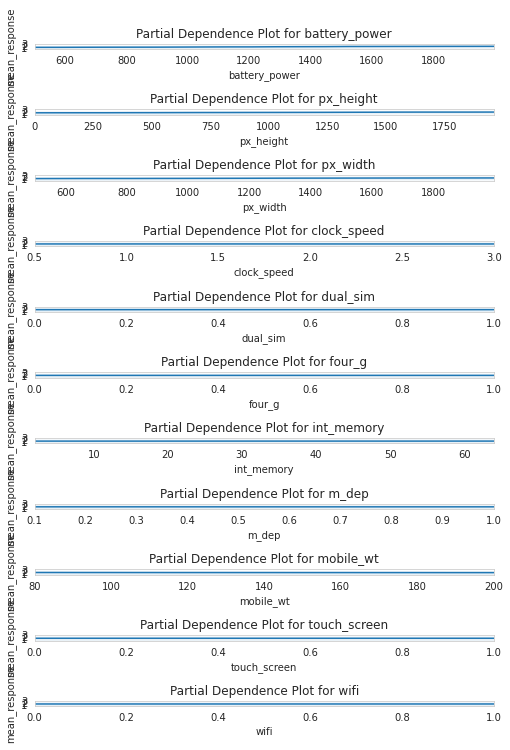

In [78]:
best_model.partial_plot(df, cols=['battery_power', 'px_height', 'px_width', 'clock_speed', 'dual_sim',  'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'touch_screen', 'wifi'])

# Q1. Is the relationship significant?

In [79]:
import statsmodels.api as sm

df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/proper-dataset/dataset/train.csv')
df.head()
X = df.drop("price_range", axis = 1)
y = df["price_range"]

X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1117.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        01:00:56   Log-Likelihood:                -552.26
No. Observations:                2000   AIC:                             1147.
Df Residuals:                    1979   BIC:                             1264.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5750      0.062    -25.553

**Here we see that there are multiple factor having p values less than 0.05 like ram, battery etc**

# Q3. Is there any multicollinearity in the model?

In [80]:
#Assigning variables to X and y
X = df.drop(['price_range'], axis=1)
X = df[['blue',	'clock_speed', 'ram',	'dual_sim',	'fc',	'four_g', 'int_memory',	'm_dep',	'mobile_wt',	'n_cores',	'pc',	'px_height',	'px_width',	'ram',	'sc_h',	'sc_w',	'talk_time',	'three_g',	'touch_screen',	'wifi']]
y = df['price_range']


In [81]:
#fit a OLS model with intercept on PaymentTier,	ExperienceInCurrentDomain,	Age
X = sm.add_constant(X)

# Fit and summary:
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            price_range   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     756.6
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        01:00:56   Log-Likelihood:                -949.57
No. Observations:                2000   AIC:                             1939.
Df Residuals:                    1980   BIC:                             2051.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9507      0.071    -13.379   

All the parameter are significant therefore it is not colinear

# Q4.  In the multivariate models are predictor variables independent of all the other predictor variables?
# Q5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
# Q8. Which independent variables are significant?

In [82]:
# Corelation of the  independent variables
import matplotlib.pyplot as plt
X.iloc[:,1:].corr()

blue  clock_speed       ram  dual_sim        fc    four_g  \
blue          1.000000     0.021419  0.026351  0.035198  0.003593  0.013443   
clock_speed   0.021419     1.000000  0.003443 -0.001315 -0.000434 -0.043073   
ram           0.026351     0.003443  1.000000  0.041072  0.015099  0.007313   
dual_sim      0.035198    -0.001315  0.041072  1.000000 -0.029123  0.003187   
fc            0.003593    -0.000434  0.015099 -0.029123  1.000000 -0.016560   
four_g        0.013443    -0.043073  0.007313  0.003187 -0.016560  1.000000   
int_memory    0.041177     0.006545  0.032813 -0.015679 -0.029133  0.008690   
m_dep         0.004049    -0.014364 -0.009434 -0.022142 -0.001791 -0.001823   
mobile_wt    -0.008605     0.012350 -0.002581 -0.008979  0.023618 -0.016537   
n_cores       0.036161    -0.005724  0.004868 -0.024658 -0.013356 -0.029706   
pc           -0.009952    -0.005245  0.028984 -0.017143  0.644595 -0.005598   
px_height    -0.006872    -0.014523 -0.020352 -0.020875 -0.009990 -0.019236   
px_width     -0.041533    -0.009476  0.004105  0.014291 -0.005176  0.007448   
ram           0.026351     0.003443  1.000000  0.041072  0.015099  0.007313   
sc_h         -0.002952    -0.029078  0.015996 -0.011949 -0.011014  0.027166   
sc_w          0.000613    -0.007378  0.035576 -0.016666 -0.012373  0.037005   
talk_time     0.013934    -0.011432  0.010820 -0.039404 -0.006829 -0.046628   
three_g      -0.030236    -0.046433  0.015795 -0.014008  0.001793  0.584246   
touch_screen  0.010061     0.019756 -0.030455 -0.017117 -0.014828  0.016758   
wifi         -0.021863    -0.024471  0.022669  0.022740  0.020085 -0.017620   

              int_memory     m_dep  mobile_wt   n_cores        pc  px_height  \
blue            0.041177  0.004049  -0.008605  0.036161 -0.009952  -0.006872   
clock_speed     0.006545 -0.014364   0.012350 -0.005724 -0.005245  -0.014523   
ram             0.032813 -0.009434  -0.002581  0.004868  0.028984  -0.020352   
dual_sim       -0.015679 -0.022142  -0.008979 -0.024658 -0.017143  -0.020875   
fc             -0.029133 -0.001791   0.023618 -0.013356  0.644595  -0.009990   
four_g          0.008690 -0.001823  -0.016537 -0.029706 -0.005598  -0.019236   
int_memory      1.000000  0.006886  -0.034214 -0.028310 -0.033273   0.010441   
m_dep           0.006886  1.000000   0.021756 -0.003504  0.026282   0.025263   
mobile_wt      -0.034214  0.021756   1.000000 -0.018989  0.018844   0.000939   
n_cores        -0.028310 -0.003504  -0.018989  1.000000 -0.001193  -0.006872   
pc             -0.033273  0.026282   0.018844 -0.001193  1.000000  -0.018465   
px_height       0.010441  0.025263   0.000939 -0.006872 -0.018465   1.000000   
px_width       -0.008335  0.023566   0.000090  0.024480  0.004196   0.510664   
ram             0.032813 -0.009434  -0.002581  0.004868  0.028984  -0.020352   
sc_h            0.037771 -0.025348  -0.033855 -0.000315  0.004938   0.059615   
sc_w            0.011731 -0.018388  -0.020761  0.025826 -0.023819   0.043038   
talk_time      -0.002790  0.017003   0.006209  0.013148  0.014657  -0.010645   
three_g        -0.009366 -0.012065   0.001551 -0.014733 -0.001322  -0.031174   
touch_screen   -0.026999 -0.002638  -0.014368  0.023774 -0.008742   0.021891   
wifi            0.006993 -0.028353  -0.000409 -0.009964  0.005389   0.051824   

              px_width       ram      sc_h      sc_w  talk_time   three_g  \
blue         -0.041533  0.026351 -0.002952  0.000613   0.013934 -0.030236   
clock_speed  -0.009476  0.003443 -0.029078 -0.007378  -0.011432 -0.046433   
ram           0.004105  1.000000  0.015996  0.035576   0.010820  0.015795   
dual_sim      0.014291  0.041072 -0.011949 -0.016666  -0.039404 -0.014008   
fc           -0.005176  0.015099 -0.011014 -0.012373  -0.006829  0.001793   
four_g        0.007448  0.007313  0.027166  0.037005  -0.046628  0.584246   
int_memory   -0.008335  0.032813  0.037771  0.011731  -0.002790 -0.009366   
m_dep         0.023566 -0.009434 -0.025348 -0.018388   0.0170

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm


X = df.drop(['price_range'], axis=1)
X = df[['blue',	'clock_speed', 'ram',	'dual_sim',	'fc',	'four_g', 'int_memory',	'm_dep',	'mobile_wt',	'n_cores',	'pc',	'px_height',	'px_width',	'ram',	'sc_h',	'sc_w',	'talk_time',	'three_g',	'touch_screen',	'wifi']]
y = df['price_range']
# X = h2o.as_list(X)
# y = h2o.as_list(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=32)

# Using Linear Regression with intercept
X_with_constant = sm.add_constant(X_train)
X_with_constant = X_with_constant.to_numpy()
model = sm.OLS(y_train, X_with_constant)
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            price_range   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     602.6
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        01:00:56   Log-Likelihood:                -760.19
No. Observations:                1600   AIC:                             1560.
Df Residuals:                    1580   BIC:                             1668.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9327      0.079    -11.747      0.0

In [84]:
#Determining how good is the model trained with residual
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=32)
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)
residual = y_test - y_pred

# Q2. Are any model assumptions violated?

In [85]:
#1) Multicolinearity Assumption
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

blue  clock_speed  ram  dual_sim        fc    four_g  int_memory  \
vif  2.029366     4.250097  inf  2.059318  3.405493  3.182018    3.866062   

        m_dep  mobile_wt   n_cores        pc  px_height   px_width  ram  \
vif  3.888954  12.620416  4.612527  6.238641   4.282704  11.608283  inf   

          sc_h      sc_w  talk_time   three_g  touch_screen      wifi  
vif  11.427445  3.779365   4.734322  6.129209      1.963229  2.017804

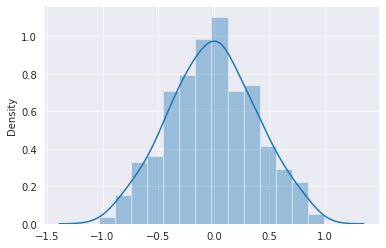

In [86]:
#2) Normality of Residual
import seaborn as sns
sns.set_style("darkgrid")
sns.distplot(residual)

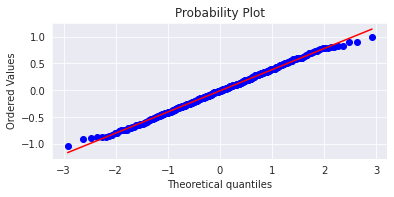

In [87]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [88]:
np.mean(residual)

-0.008520735777994302

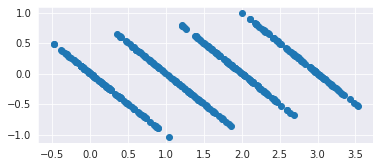

In [89]:
##3) Homoscedasticity
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

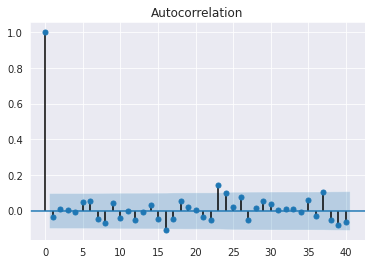

In [90]:
##4) No autocorrelation of residuals
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

# Q6. Does the model make sense?

**Yes the model makes sense, semiconductor are expensive resource for building microchip. The model show strong corelation with the RAM of the mobile phone and the display size which result in increase of the mobile phone prices. Higher the RAM or Display size the price of the phone goes up**

# Q7. Does regularization help?

In [91]:
#Linear Regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-0.15395992248849125


In [92]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [93]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-0.1536195623069752


# Q9. Which hyperparameters are important?

 

**Trying to run the RandomForestClassifier with hyperparameter to improve the model with n_estimaors**

In [94]:
classifier=  RandomForestClassifier(n_jobs=-1)
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [1,2,3,4,5],
    "criterion": ["gini","entropy"]
    }

from sklearn import model_selection
from sklearn import ensemble
model = model_selection.GridSearchCV(
    estimator= classifier,
    param_grid=param_grid,
    scoring="accuracy",
    verbose=10,
    n_jobs=1,
    cv=5,
)

model.fit(X,y)
print(model.best_score_) 
print(model.best_estimator_.get_params()) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5; 1/50] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 1/5; 1/50] END criterion=gini, max_depth=1, n_estimators=100;, score=0.542 total time=   2.0s
[CV 2/5; 1/50] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 2/5; 1/50] END criterion=gini, max_depth=1, n_estimators=100;, score=0.575 total time=   0.3s
[CV 3/5; 1/50] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 3/5; 1/50] END criterion=gini, max_depth=1, n_estimators=100;, score=0.605 total time=   0.3s
[CV 4/5; 1/50] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 4/5; 1/50] END criterion=gini, max_depth=1, n_estimators=100;, score=0.532 total time=   0.3s
[CV 5/5; 1/50] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 5/5; 1/50] END criterion=gini, max_depth=1, n_estimators=100;, score=0.520 total time=   0.3s
[CV 1/5; 2/50] START criterion=gini, max_de

In [95]:
h2o.cluster().shutdown()


H2O session _sid_8610 closed.


# Modelling Conclusion:
In this section, we have performed modelling using AutoML, AutoML has processed our dataset automatically and ran different models, and given out put as GBM as the best model.

# Node 5 - Model Interpretability and error analysis


Interpret your models.

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

## Import Libraries

In [96]:
!pip install shap
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

# Import libraries
# Use pip install or conda install if missing a library
import warnings
warnings.filterwarnings('ignore')
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# MAE
from sklearn.metrics import mean_absolute_error

# SHAP
import shap
from sklearn.feature_extraction.text import TfidfVectorizer



     |████████████████████████████████| 564 kB 11.8 MB/s 


# Load the data

In [97]:
df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/proper-dataset/dataset/train.csv')
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [98]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

# Checking Data and Null values

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [100]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Training model on data set


## 1. Linear Regression
## 2. Decision Tree Classifier 
## 3. AutoML




## As there are no null or missing values present and all values are numeric we dont need to clean the data.

# Preprating Test and Train Data

In [101]:
df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/proper-dataset/dataset/train.csv')

X = df.drop("price_range", axis = 1)
y = df["price_range"]

# Create the X_train and y_train
X_train = df.drop("price_range", axis = 1)
y_train = df["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
X_train.shape, X_test.shape

np.random.seed(42);

In [102]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.9197112539068574

#### Linear Regression Model has accuracy of `91.11%`


#### Mean Aboslute Error for  Linear Regression

In [103]:
y_preds = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.2662083432900277

## 1.2 SHAP Value on Linear Regression

### Using Linear Explainer

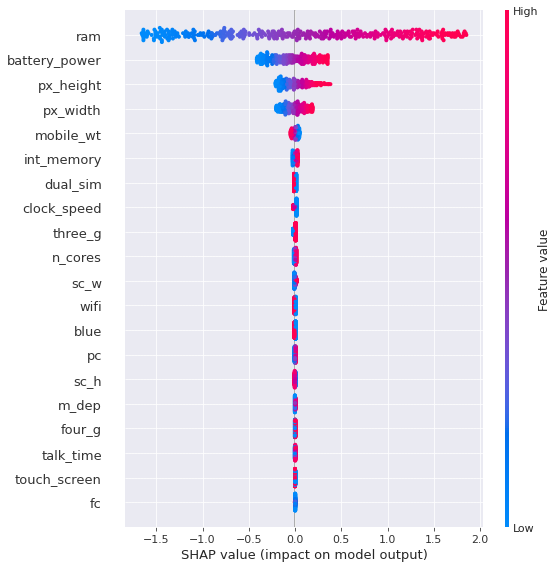

In [104]:
explainer = shap.LinearExplainer(lr_model, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

## We can see that the are 4 major variable which affect the pricing of the phone


1.   RAM
2.   Battery Power
3.   Pixel Height
4.   Weight of the phone




## Shap plot for Phone which is classified in 0 range (Lowest Price)

In [105]:
# y_test contain result of mobile class
y_test.iloc[1]

# y_test

3

In [106]:
ex = shap.KernelExplainer(lr_model.predict, X_test)
shap.initjs()

# Plotting for Mobile phone in 0 price range
shap_values = ex.shap_values(X_test.iloc[1,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[1,:])

Using 400 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


We can see that as the column contain data regarding the lowest price phone the due to the less ram size the price is lower

## Shap plot for Phone which is classified in 2 range (Medium Price)

In [107]:
# y_test contain result of mobile class
y_test.iloc[0]

3

In [108]:
# Plotting for Mobile phone in 2 price range
shap.initjs()
shap_values = ex.shap_values(X_test.iloc[0,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0,:])

From the SHAP plot we can see that that `ram` feature is pushing the price of phone.

## Shap plot for Phone which is classified in 3 range (Highest Price)

In [109]:
# y_test contain result of mobile class
y_test.iloc[7]

1

In [110]:
# Plotting for Mobile phone in 2 price range
shap.initjs()
shap_values = ex.shap_values(X_test.iloc[7,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[7,:])

## Here we can see the difference for phone with more ram memory, battery, pixel height and weight is affects the price of the phone. The features in red impacts the output and pushes the price of the phone on the higher side on the other hand the variable in blue pulls the phone pricing down.

## Summary Plot for the first 100 test dataset

  0%|          | 0/100 [00:00<?, ?it/s]

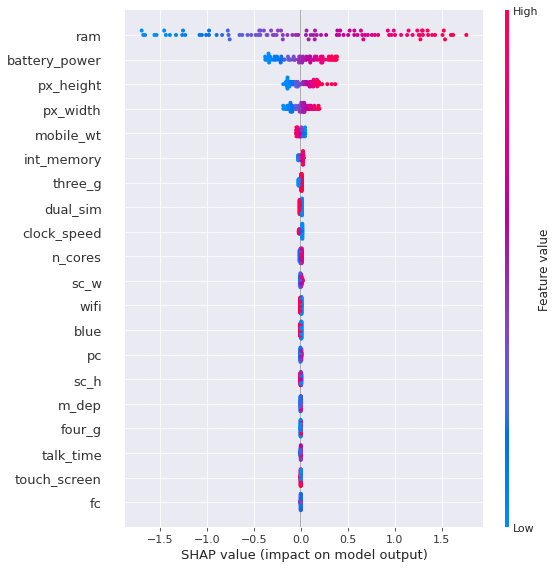

In [111]:
shap_values = ex.shap_values(X_test[:100])
shap.summary_plot(shap_values, X_test[:100])

## Force plot for the dataset

In [112]:
shap.initjs()
shap.force_plot(ex.expected_value, shap_values, X_test)


## 2. Decision Tree Classifier (Tree Based Model)

In [113]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_model.score(X_test, y_test)

0.85

#### Decision Tree Classifier model has accuracy about `83.25%`

## Mean Aboslute Error for Decision Tree Classifier

In [114]:
y_preds = dt_model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.15

## 2.1 SHAP On Decision Tree Classifier

## SHAP Summary Plot

The summary plot gives a global picture and similar to feature importance plot of tress . Here how each feature impacts the model for each class is shown.

We are using the TreeExplainer for Shap analysis

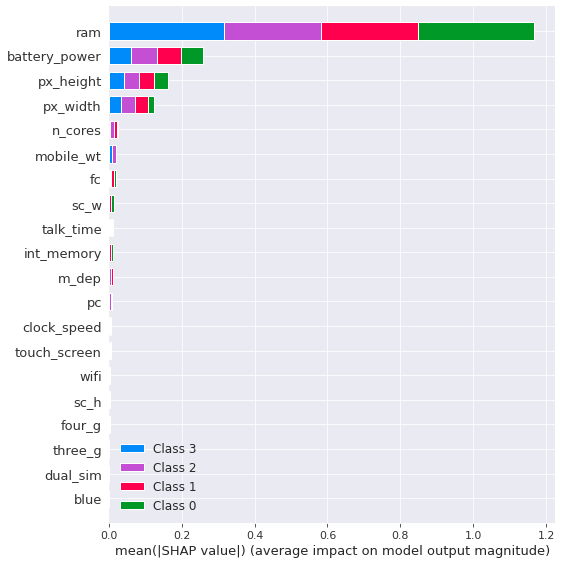

In [115]:
# explain all the predictions in the test set
explainer = shap.TreeExplainer(dt_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

*  We can again see that RAM, Battery Power, Height and pixel affect the model
*  We can see that there are more no. of expensive class 3 phone present in the dataset



## Summary plot for a single class


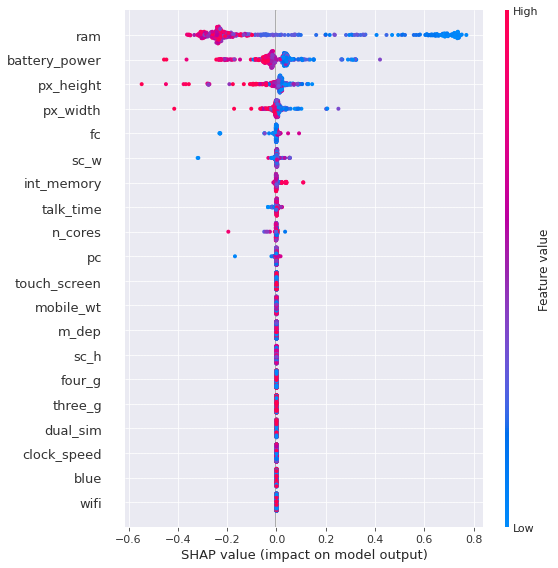

In [116]:
shap.initjs()
shap.summary_plot(shap_values[0], X_test)

Red denotes a low feature value, whereas blue denotes a high feature value. As we can see, low ram values increase the likelihood of belonging to class 0. Similarly, low battery power, px width, and px height values increase the likelihood of belonging to class 0. If you look at the class 3 summary density map, you will notice the exact reverse of class 0, i.e. low ram values push down the probability of belonging to class 3 the higher the price range, which is a reasonable conclusion.

### Decision Plot


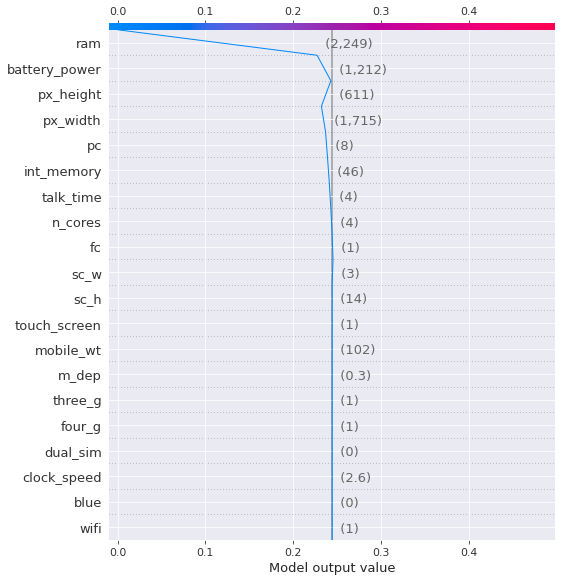

In [117]:
shap.initjs()
shap.decision_plot(explainer.expected_value[0], 
                shap_values[0][3,:], X_test.iloc[3,:])

### This decision plot can show how predictions vary when a collection of feature values changes. 

## 3. Running AutoML to find out the best model

In [118]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

# Use 50% of availible resources
pct_memory=0.75
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

8
Checking whether there is an H2O instance running at http://localhost:33310 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4opg4hhg
  JVM stdout: /tmp/tmp4opg4hhg/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4opg4hhg/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:33310
Connecting to H2O server at http://127.0.0.1:33310 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.1.1
H2O_cluster_version_age:    23 days
H2O_cluster_name:           H2O_from_python_unknownUser_rn3ahl
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    8 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:33310
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.13 final
--------------------------  ----------------------------------

In [119]:

# Prepare the data for AutoML
# Download the train data csv file and load in the training dataset 
url = "https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/proper-dataset/dataset/train.csv"
df_aml = h2o.import_file(path = url)
pct_rows=0.80
df_aml_train, df_aml_test = df_aml.split_frame([pct_rows])
X_aml = df_aml_train.columns

y_aml = 'price_range'
X_aml.remove(y_aml)

# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

aml.train(x=X_aml,y=y_aml,training_frame=df_aml_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_3_AutoML_1_20220507_11130

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.011049556240575473
RMSE: 0.10511686943861805
MAE: 0.08205178184254577
RMSLE: 0.05327744234068994
R^2: 0.991173325818418
Mean Residual Deviance: 0.011049556240575473
Null degrees of freedom: 1618
Residual degrees of freedom: 1602
Null deviance: 2026.7239036442252
Residual deviance: 17.88923155349169
AIC: -2663.6629823711432

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.06575689257592911
RMSE: 0.256431067883611
MAE: 0.1825631388634871
RMSLE: 0.1239830098883609
R^2: 0.9474716763891696
Mean Residual Deviance: 0.065756892

mean         sd  cv_1_valid  cv_2_valid  \
0                     mae    0.182521   0.010849    0.170444    0.196483   
1  mean_residual_deviance    0.065733   0.006639    0.058058    0.074724   
2                     mse    0.065733   0.006639    0.058058    0.074724   
3           null_deviance  405.595600  18.354298  391.872200  405.871000   
4                      r2    0.947302   0.006371    0.952664    0.939963   
5       residual_deviance   21.292082   2.255573   18.520620   24.285452   
6                    rmse    0.256125   0.012900    0.240953    0.273358   
7                   rmsle    0.123722   0.008564    0.114458    0.131260   

   cv_3_valid  cv_4_valid  cv_5_valid  
0    0.175386    0.179433    0.190860  
1    0.061409    0.064653    0.069822  
2    0.061409    0.064653    0.069822  
3  434.492160  407.990000  387.752720  
4    0.953451    0.949290    0.941140  
5   20.203533   20.688892   22.761913  
6    0.247808    0.254269    0.264238  
7    0.116278    0.123145    0.133469

In [120]:
print(aml.leaderboard)

model_id rmse mse mae rmsle mean_residual_deviance 
 
 
 StackedEnsemble_AllModels_3_AutoML_1_20220507_11130 0.256431 0.0657569 0.182563 0.123983 0.0657569 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20220507_11130 0.25792 0.0665225 0.180132 0.12553 0.0665225 
 StackedEnsemble_AllModels_2_AutoML_1_20220507_11130 0.262429 0.0688688 0.194938 0.128532 0.0688688 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20220507_11130 0.264369 0.0698911 0.199541 0.129288 0.0698911 
 StackedEnsemble_AllModels_1_AutoML_1_20220507_11130 0.264547 0.0699853 0.195828 0.130955 0.0699853 
 GBM_grid_1_AutoML_1_20220507_11130_model_12 0.265009 0.0702295 0.165243 0.128476 0.0702295 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20220507_11130 0.266845 0.0712064 0.198983 0.132066 0.0712064 
 GBM_grid_1_AutoML_1_20220507_11130_model_5 0.267034 0.0713069 0.181111 0.131302 0.0713069 
 GBM_grid_1_AutoML_1_20220507_11130_model_2 0.267657 0.0716401 0.200514 0.130621 0.0716401 
 XGBoost_grid_1_AutoML_1_20220507_11130_model_48 0.270251 0.0730354 0.184945 0.129468 0.0730354

In [121]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict


{'GBM_grid_1_AutoML_1_20220507_11130_model_12': 5,
 'GLM_1_AutoML_1_20220507_11130': 74,
 'StackedEnsemble_AllModels_1_AutoML_1_20220507_11130': 4,
 'StackedEnsemble_AllModels_2_AutoML_1_20220507_11130': 2,
 'StackedEnsemble_AllModels_3_AutoML_1_20220507_11130': 0,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20220507_11130': 3,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20220507_11130': 1}

In [122]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

5


In [123]:
best_model.algo

'gbm'

## AutoML suggested **GBM Gradient Boosting Machine** model works best

In [124]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)
gbm_model.score(X_test, y_test)

0.91

#### Gradient Boosting Machine has accuracy of `89.95%`

In [125]:
lb = aml.leaderboard
lb
bst_model = aml.leader

feature_names = list(X_train.columns)

In [126]:
class H2OProbWrapper:
    def __init__(self, h2o_model, feature_names):
        self.h2o_model = h2o_model
        self.feature_names = feature_names

    def predict_binary_prob(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        self.dataframe= pd.DataFrame(X, columns=self.feature_names)
        self.predictions = self.h2o_model.predict(h2o.H2OFrame(self.dataframe)).as_data_frame().values
        return self.predictions.astype('float64')[:,-1] #probability of True class

In [127]:
h2o_wrapper = H2OProbWrapper(bst_model,feature_names) 


In [128]:
X_train.shape[0]


1600

In [129]:
explainer = shap.KernelExplainer(h2o_wrapper.predict_binary_prob, X_train.iloc[:100,:])


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


We are having similar result as the eairler model.

## Waterfall Plot

In [130]:
explainer = shap.Explainer(gbm_model.predict, X_train)
shap_values = explainer(X_test)

Permutation explainer: 401it [01:36,  3.81it/s]


In [131]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

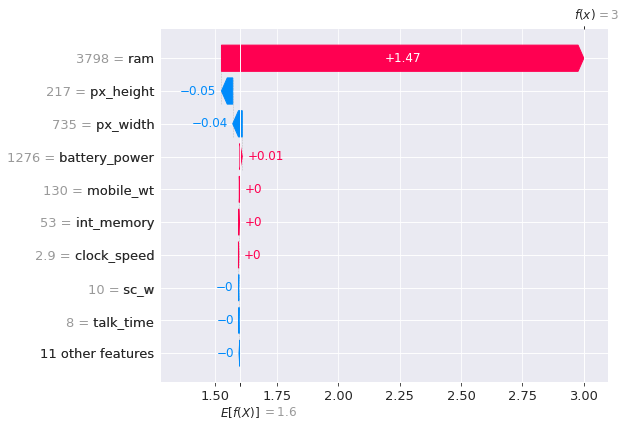

In [132]:
sample_feature_importance(0, 'waterfall')


The value in the red push the value upside and the value in blue bring the value down. We can see that ram is pushing the value up

In [133]:
shap.initjs()
sample_feature_importance(0, 'condensed')

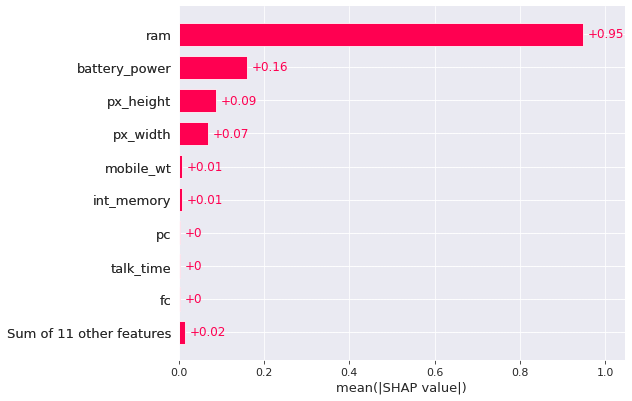

In [134]:
shap.plots.bar(shap_values)

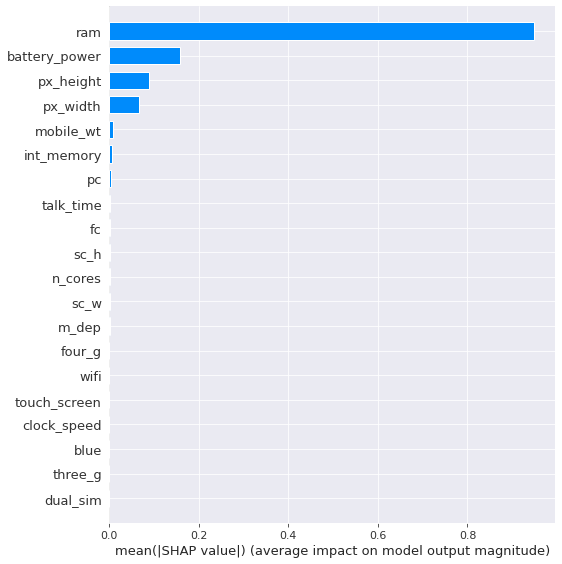

In [135]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

We can deduce that all four feature have a significant effect on the output.

# Partial Dependence Plot on ram and battery_power

In [136]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            gbm_model.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature, 
            gbm_model.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

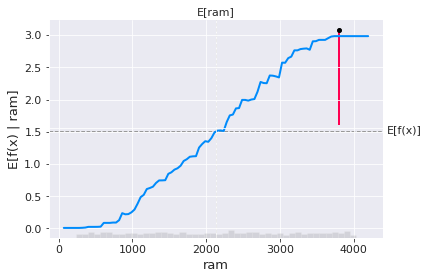

In [137]:
partial_dependence_plot('ram', 0)


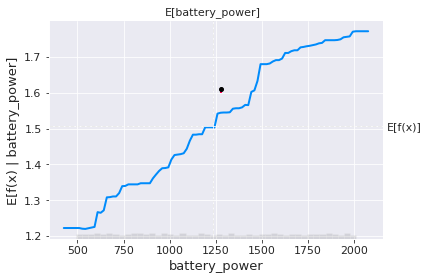

In [138]:
partial_dependence_plot('battery_power', 0)


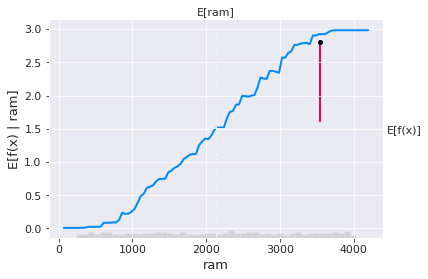

In [139]:
partial_dependence_plot('ram', 1)


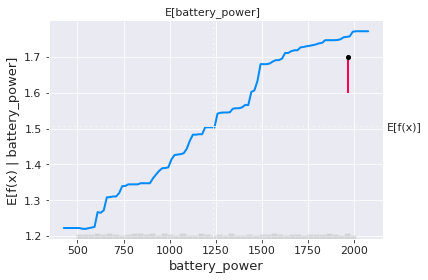

In [140]:
partial_dependence_plot('battery_power', 1)


From both the plot we can decude that battery_power and ram have the most impact on the output.

In [141]:
h2o.cluster().shutdown()

H2O session _sid_adc4 closed.


# Conclusion

In this notebook we have trained our dataset on three model, and then performed the SHAP analysis on each model, for every model and shap analysis we find that the there are 4 important feature which are significant for that output. 

# Node 6: Reports and Visualization

In [142]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [143]:
# Check coef_
clf.coef_

array([[-2.79731159e-03,  3.46871779e-01,  5.92666100e-01,
         4.47086736e-01, -1.46134116e-02,  2.40511411e-01,
         1.14309595e-02,  4.85305487e-01,  2.09391480e-02,
         2.19723661e-01,  5.86605582e-02, -2.34785928e-03,
        -8.49719929e-04, -5.95355889e-03,  1.83699678e-01,
        -1.75555681e-02,  7.47311490e-02,  4.26165630e-01,
         5.59038685e-01,  5.12476814e-01],
       [-7.59497799e-06, -2.94422652e-02, -3.79569591e-02,
         1.21420315e-02,  1.15493160e-02, -8.36906018e-03,
         8.40047422e-04,  5.00016773e-02,  1.16076388e-03,
        -6.51072329e-02, -2.90386421e-03,  1.24976147e-04,
         3.12141814e-05, -5.55311138e-04, -1.91500967e-03,
        -1.11545965e-02,  1.12391042e-02, -1.31387492e-02,
         4.27778078e-02,  1.10916227e-02],
       [-8.57445876e-05, -1.13752563e-01, -5.20028389e-02,
        -1.23280035e-01,  1.39750235e-02, -2.21281869e-01,
        -8.75870135e-03, -2.49241012e-01,  1.71626034e-03,
         2.30470088e-02, -8.2

In [144]:
# Check coef_
clf.coef_

array([[-2.79731159e-03,  3.46871779e-01,  5.92666100e-01,
         4.47086736e-01, -1.46134116e-02,  2.40511411e-01,
         1.14309595e-02,  4.85305487e-01,  2.09391480e-02,
         2.19723661e-01,  5.86605582e-02, -2.34785928e-03,
        -8.49719929e-04, -5.95355889e-03,  1.83699678e-01,
        -1.75555681e-02,  7.47311490e-02,  4.26165630e-01,
         5.59038685e-01,  5.12476814e-01],
       [-7.59497799e-06, -2.94422652e-02, -3.79569591e-02,
         1.21420315e-02,  1.15493160e-02, -8.36906018e-03,
         8.40047422e-04,  5.00016773e-02,  1.16076388e-03,
        -6.51072329e-02, -2.90386421e-03,  1.24976147e-04,
         3.12141814e-05, -5.55311138e-04, -1.91500967e-03,
        -1.11545965e-02,  1.12391042e-02, -1.31387492e-02,
         4.27778078e-02,  1.10916227e-02],
       [-8.57445876e-05, -1.13752563e-01, -5.20028389e-02,
        -1.23280035e-01,  1.39750235e-02, -2.21281869e-01,
        -8.75870135e-03, -2.49241012e-01,  1.71626034e-03,
         2.30470088e-02, -8.2

In [145]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'battery_power': -0.0027973115946817177,
 'blue': 0.34687177852341,
 'clock_speed': 0.5926661001538959,
 'dual_sim': 0.44708673607136806,
 'fc': -0.014613411623746688,
 'four_g': 0.2405114106716349,
 'int_memory': 0.011430959482355063,
 'm_dep': 0.4853054870722289,
 'mobile_wt': 0.020939147953247594,
 'n_cores': 0.21972366099292528,
 'pc': 0.058660558173185065,
 'px_height': -0.00234785928036634,
 'px_width': -0.0008497199290231885,
 'ram': -0.005953558890601618,
 'sc_h': 0.18369967755432812,
 'sc_w': -0.017555568141800044,
 'talk_time': 0.07473114899511214,
 'three_g': 0.4261656302870255,
 'touch_screen': 0.5590386852529163,
 'wifi': 0.5124768144896606}

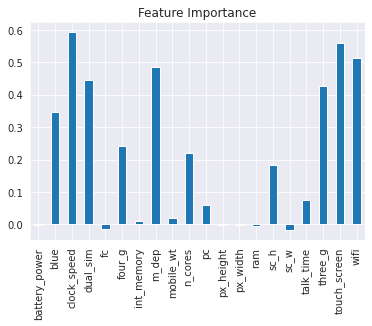

In [146]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [147]:
pd.crosstab(df["ram"], df["price_range"])

price_range  0  1  2  3
ram                    
256          1  0  0  0
258          2  0  0  0
259          1  0  0  0
262          1  0  0  0
263          1  0  0  0
...         .. .. .. ..
3990         0  0  0  1
3991         0  0  0  2
3993         0  0  0  1
3996         0  0  0  1
3998         0  0  0  1

[1562 rows x 4 columns]

In [148]:
pd.crosstab(df["battery_power"], df["price_range"])

price_range    0  1  2  3
battery_power            
501            0  1  1  0
502            0  1  1  0
503            1  1  0  1
504            3  1  1  0
506            0  0  1  0
...           .. .. .. ..
1994           1  0  1  1
1995           0  1  1  0
1996           0  1  1  0
1997           0  0  1  0
1998           0  0  1  0

[1094 rows x 4 columns]

In [149]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [150]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'KNN': 0.91, 'Logistic Regression': 0.65, 'Random Forest': 0.885}

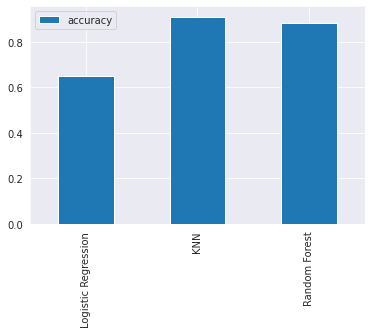

In [151]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [152]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 94.25%


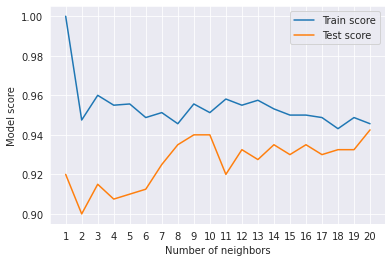

In [153]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# Conclusion:

We have performed all the step on the dataset, we find out that `KNN` is the best model which give accuracy of 92 percent, also it is evident that `ram` and `battery_power` are the significant feature which push the price of mobile phone.

MIT License

 

Copyright (c) 2022 Pratik Gawand

 

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

 

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

 

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

## Reference

- https://shap.readthedocs.io/en/latest/tabular_examples.html
- https://github.com/aiprobably/SHAP
- https://www.youtube.com/watch?v=m60swo-th4E
- https://medium.com/dataman-in-ai/the-shap-values-with-h2o-models-773a203b75e3
- https://stackoverflow.com/
- https://www.analyticsvidhya.com/